###Problem Statement
#[insert]


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# https://data.ny.gov/Transportation/Turnstile-Usage-Data-2016/ekwu-khcy
# https://data.ny.gov/api/views/ekwu-khcy/rows.csv?accessType=DOWNLOAD
data = pd.read_csv('Turnstile_Usage_Data__2016.csv')
data.shape

/Users/brianmcmahon/anaconda3/envs/tensorflow1.4/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(9492670, 11)

In [3]:
df = pd.DataFrame(data)
df.shape

(9492670, 11)

In [4]:
df.columns

Index(['C/A', 'Unit', 'SCP', 'Station', 'Line Name', 'Division', 'Date',
       'Time', 'Description', 'Entries',
       'Exits                                                     '],
      dtype='object')

In [5]:
df=df.rename(columns = {'Exits                                                     ':'Exits'})

In [6]:
df.columns

Index(['C/A', 'Unit', 'SCP', 'Station', 'Line Name', 'Division', 'Date',
       'Time', 'Description', 'Entries', 'Exits'],
      dtype='object')

In [7]:
df.head()

,C/A,Unit,SCP,Station,Line Name,Division,Date,Time,Description,Entries,Exits
0,A002,R051,02-00-00,59 ST,NQR456,BMT,03/04/2016,23:00:00,REGULAR,5572864,1881239
1,A002,R051,02-00-00,59 ST,NQR456,BMT,03/04/2016,19:00:00,REGULAR,5572521,1881206
2,A002,R051,02-00-00,59 ST,NQR456,BMT,03/04/2016,15:00:00,REGULAR,5571587,1881113
3,A002,R051,02-00-00,59 ST,NQR456,BMT,03/04/2016,11:00:00,REGULAR,5571313,1881031
4,A002,R051,02-00-00,59 ST,NQR456,BMT,03/04/2016,08:10:05,REGULAR,5571173,1880736


In [8]:
df.describe()

,Entries,Exits
count,9.492670e+06,9.492670e+06
mean,3.542553e+07,2.850508e+07
std,1.953005e+08,1.754109e+08
min,0.000000e+00,0.000000e+00
25%,5.723050e+05,2.936032e+05
50%,2.595306e+06,1.507240e+06
75%,6.546587e+06,4.656424e+06
max,2.147480e+09,2.097170e+09


In [9]:
q4 = df.iloc[:,3:]
print(q4.shape)
print(type(q4))

(9492670, 8)
<class 'pandas.core.frame.DataFrame'>


In [10]:
q4['Entry_Inc'] = abs(q4.Entries.diff())
q4['Exits_Inc'] = abs(q4.Exits.diff())
q4['Traffic_Tot'] = np.add(q4.Entry_Inc, q4.Exits_Inc)
q4.head()

,Station,Line Name,Division,Date,Time,Description,Entries,Exits,Entry_Inc,Exits_Inc,Traffic_Tot
0,59 ST,NQR456,BMT,03/04/2016,23:00:00,REGULAR,5572864,1881239,NaN,NaN,NaN
1,59 ST,NQR456,BMT,03/04/2016,19:00:00,REGULAR,5572521,1881206,343.0,33.0,376.0
2,59 ST,NQR456,BMT,03/04/2016,15:00:00,REGULAR,5571587,1881113,934.0,93.0,1027.0
3,59 ST,NQR456,BMT,03/04/2016,11:00:00,REGULAR,5571313,1881031,274.0,82.0,356.0
4,59 ST,NQR456,BMT,03/04/2016,08:10:05,REGULAR,5571173,1880736,140.0,295.0,435.0


In [11]:
q4.describe()

,Entries,Exits,Entry_Inc,Exits_Inc,Traffic_Tot
count,9.492670e+06,9.492670e+06,9.492669e+06,9.492669e+06,9.492669e+06
mean,3.542553e+07,2.850508e+07,1.231872e+06,1.008795e+06,2.240667e+06
std,1.953005e+08,1.754109e+08,3.808489e+07,3.418167e+07,6.799992e+07
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,5.723050e+05,2.936032e+05,1.200000e+01,9.000000e+00,3.500000e+01
50%,2.595306e+06,1.507240e+06,8.300000e+01,5.500000e+01,1.850000e+02
75%,6.546587e+06,4.656424e+06,2.680000e+02,1.790000e+02,4.950000e+02
max,2.147480e+09,2.097170e+09,2.147406e+09,2.097170e+09,4.227935e+09


In [12]:
# aggregate by station then by day
# add columns for incremental change by day
# remove outliers
# per station, two sep analyses: group by time, and group by date, weekday/weekend


q4.head()

,Station,Line Name,Division,Date,Time,Description,Entries,Exits,Entry_Inc,Exits_Inc,Traffic_Tot
0,59 ST,NQR456,BMT,03/04/2016,23:00:00,REGULAR,5572864,1881239,NaN,NaN,NaN
1,59 ST,NQR456,BMT,03/04/2016,19:00:00,REGULAR,5572521,1881206,343.0,33.0,376.0
2,59 ST,NQR456,BMT,03/04/2016,15:00:00,REGULAR,5571587,1881113,934.0,93.0,1027.0
3,59 ST,NQR456,BMT,03/04/2016,11:00:00,REGULAR,5571313,1881031,274.0,82.0,356.0
4,59 ST,NQR456,BMT,03/04/2016,08:10:05,REGULAR,5571173,1880736,140.0,295.0,435.0


In [13]:
outlier = 1000000 # rough estimate of outlier cutoff (ie no station can handle more than this amount in a 4 hour period)
q4['Entry_Inc'] = q4['Entry_Inc'][q4['Entry_Inc']<outlier]
q4['Exits_Inc'] = q4['Exits_Inc'][q4['Exits_Inc']<outlier]

In [14]:
print(q4['Entry_Inc'].describe())
print(q4['Exits_Inc'].describe())

count    9.361181e+06
mean     2.368500e+03
std      3.642895e+04
min      0.000000e+00
25%      1.200000e+01
50%      8.000000e+01
75%      2.560000e+02
max      9.999540e+05
Name: Entry_Inc, dtype: float64
count    9.378490e+06
mean     2.874711e+03
std      4.046169e+04
min      0.000000e+00
25%      9.000000e+00
50%      5.300000e+01
75%      1.710000e+02
max      9.999850e+05
Name: Exits_Inc, dtype: float64


In [15]:
q4_stndatetime = q4.groupby([ "Station", "Date",'Time']).sum()
q4_stndatetime.head()

Entries       Exits  Entry_Inc  Exits_Inc  \
Station Date       Time                                                     
1 AV    01/02/2016 03:00:00  1407788395  1469357462      319.0      525.0   
                   07:00:00  1407788714  1469357987     1607.0     1841.0   
                   11:00:00  1407790321  1469359828     3904.0     3802.0   
                   15:00:00  1407794225  1469363630     4463.0     5779.0   
                   19:00:00  1407798688  1469369409     4132.0     4991.0   

                             Traffic_Tot  
Station Date       Time                   
1 AV    01/02/2016 03:00:00        844.0  
                   07:00:00       3448.0  
                   11:00:00       7706.0  
                   15:00:00      10242.0  
                   19:00:00       9123.0

In [16]:
q4_stn = q4.groupby([ "Station"]).sum()
q4_stn.head()

,Entries,Exits,Entry_Inc,Exits_Inc,Traffic_Tot
Station,,,,,
1 AV,3024201401025,4354358695373,7039432.0,22263610.0,2.943758e+11
103 ST,318795241886,1198411565204,9218950.0,72997474.0,4.866449e+10
103 ST-CORONA,134651519035,128147840250,47672721.0,28166366.0,5.051118e+09
104 ST,9154642600135,8556101945975,14926376.0,38246960.0,4.429584e+11
110 ST,57531092635,59290539286,46371623.0,14958250.0,2.294564e+09


In [17]:
q4_stn = pd.DataFrame(q4_stn)
q4_stn.head()

,Entries,Exits,Entry_Inc,Exits_Inc,Traffic_Tot
Station,,,,,
1 AV,3024201401025,4354358695373,7039432.0,22263610.0,2.943758e+11
103 ST,318795241886,1198411565204,9218950.0,72997474.0,4.866449e+10
103 ST-CORONA,134651519035,128147840250,47672721.0,28166366.0,5.051118e+09
104 ST,9154642600135,8556101945975,14926376.0,38246960.0,4.429584e+11
110 ST,57531092635,59290539286,46371623.0,14958250.0,2.294564e+09


In [18]:
q4_stn['Station_ID'] = q4_stn.index
q4_stn.head()

,Entries,Exits,Entry_Inc,Exits_Inc,Traffic_Tot,Station_ID
Station,,,,,,
1 AV,3024201401025,4354358695373,7039432.0,22263610.0,2.943758e+11,1 AV
103 ST,318795241886,1198411565204,9218950.0,72997474.0,4.866449e+10,103 ST
103 ST-CORONA,134651519035,128147840250,47672721.0,28166366.0,5.051118e+09,103 ST-CORONA
104 ST,9154642600135,8556101945975,14926376.0,38246960.0,4.429584e+11,104 ST
110 ST,57531092635,59290539286,46371623.0,14958250.0,2.294564e+09,110 ST


In [19]:
q4_stn = q4_stn.sort_values(['Traffic_Tot'], ascending=[False])
q4_stn.head()

,Entries,Exits,Entry_Inc,Exits_Inc,Traffic_Tot,Station_ID
Station,,,,,,
23 ST,13645856564996,12685486541274,387902283.0,300804283.0,9.361456e+11,23 ST
42 ST-PORT AUTH,16388626010334,13248382692085,231079668.0,294064363.0,8.585691e+11,42 ST-PORT AUTH
TIMES SQ-42 ST,12064186895869,9450992692365,177061716.0,174303068.0,8.332562e+11,TIMES SQ-42 ST
125 ST,12700657231710,7017318813280,190124161.0,111171046.0,7.221678e+11,125 ST
CANAL ST,10776151565829,9240386976309,246660986.0,206736920.0,7.119782e+11,CANAL ST


In [20]:
q4_stn['Idx'] = np.arange(q4_stn.shape[0])
q4_stn.head()

,Entries,Exits,Entry_Inc,Exits_Inc,Traffic_Tot,Station_ID,Idx
Station,,,,,,,
23 ST,13645856564996,12685486541274,387902283.0,300804283.0,9.361456e+11,23 ST,0
42 ST-PORT AUTH,16388626010334,13248382692085,231079668.0,294064363.0,8.585691e+11,42 ST-PORT AUTH,1
TIMES SQ-42 ST,12064186895869,9450992692365,177061716.0,174303068.0,8.332562e+11,TIMES SQ-42 ST,2
125 ST,12700657231710,7017318813280,190124161.0,111171046.0,7.221678e+11,125 ST,3
CANAL ST,10776151565829,9240386976309,246660986.0,206736920.0,7.119782e+11,CANAL ST,4


In [21]:
q4_stn = q4_stn.set_index('Idx')
q4_stn.head()

,Entries,Exits,Entry_Inc,Exits_Inc,Traffic_Tot,Station_ID
Idx,,,,,,
0,13645856564996,12685486541274,387902283.0,300804283.0,9.361456e+11,23 ST
1,16388626010334,13248382692085,231079668.0,294064363.0,8.585691e+11,42 ST-PORT AUTH
2,12064186895869,9450992692365,177061716.0,174303068.0,8.332562e+11,TIMES SQ-42 ST
3,12700657231710,7017318813280,190124161.0,111171046.0,7.221678e+11,125 ST
4,10776151565829,9240386976309,246660986.0,206736920.0,7.119782e+11,CANAL ST


In [22]:
# demographic data: NYC census
# map of startups in NYC
# calendar of tech events
# unicorn 

import seaborn as sns
sns.set_style("whitegrid")


In [23]:
q4_stn = q4_stn.iloc[:20,:] # limit to 10 most active stations
q4_stn


,Entries,Exits,Entry_Inc,Exits_Inc,Traffic_Tot,Station_ID
Idx,,,,,,
0,13645856564996,12685486541274,387902283.0,300804283.0,9.361456e+11,23 ST
1,16388626010334,13248382692085,231079668.0,294064363.0,8.585691e+11,42 ST-PORT AUTH
2,12064186895869,9450992692365,177061716.0,174303068.0,8.332562e+11,TIMES SQ-42 ST
3,12700657231710,7017318813280,190124161.0,111171046.0,7.221678e+11,125 ST
4,10776151565829,9240386976309,246660986.0,206736920.0,7.119782e+11,CANAL ST
5,8143327410879,8630672918446,124984684.0,236264744.0,6.876278e+11,CHAMBERS ST
6,8417908307707,8738352584371,634776793.0,619193900.0,5.235118e+11,FULTON ST
7,6036919649605,6152725101145,61419326.0,92293810.0,5.220321e+11,72 ST
8,7179179892448,6326966690844,159953088.0,309586349.0,5.186163e+11,59 ST COLUMBUS


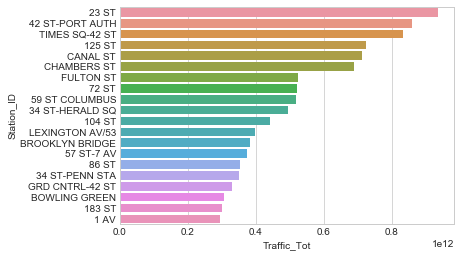

In [24]:
ax = sns.barplot(x="Traffic_Tot", y='Station_ID', data=q4_stn)


In [ ]:
# PROBLEM STATEMENT
# Optimize utilization of street teams by using data science by utilizing MTA 
# and [Demographic] data

# PRESENTATION
# Executive Summary / Scenario
# MTA findings
# Demographic findings
# Combined MTA/Demo Analysis
# Conclusion
# Q&A

# TODO:
# Map which includes demographic data (ie income) and station activity (by size of dot)
# Analyze top stations by time period (season, month, week, day, hour)
# add lat/long
# vet data better / graph 